# Initialize

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
pd.options.display.max_columns=None
from src.client.client import ClientHelper
from src.analysis.analyse import OrdersAnalyser, AssetAnalyser
from src.utils.utils import load_api_keys_from_json

In [2]:
api_key, api_secret = load_api_keys_from_json('../api_key.json')
client_helper = ClientHelper(api_key, api_secret)

# Analyze portfolio

SOLO coin is not listed in binance, price is not available


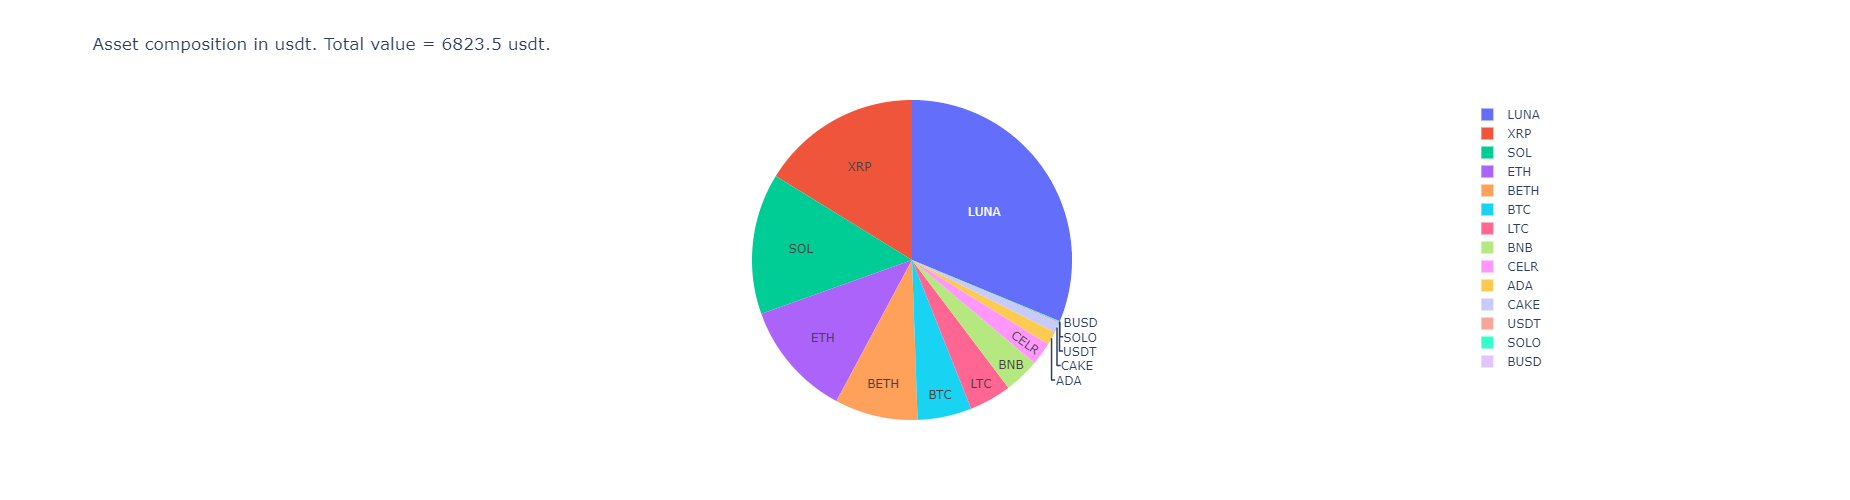

In [3]:
prices = client_helper.query_prices()
history_assets = client_helper.get_history_assets('SPOT', days=30)
asset_analyser = AssetAnalyser(client_helper)
portfolio_fig = asset_analyser.plot_asset_composition_in_usdt(history_assets, prices)
portfolio_fig

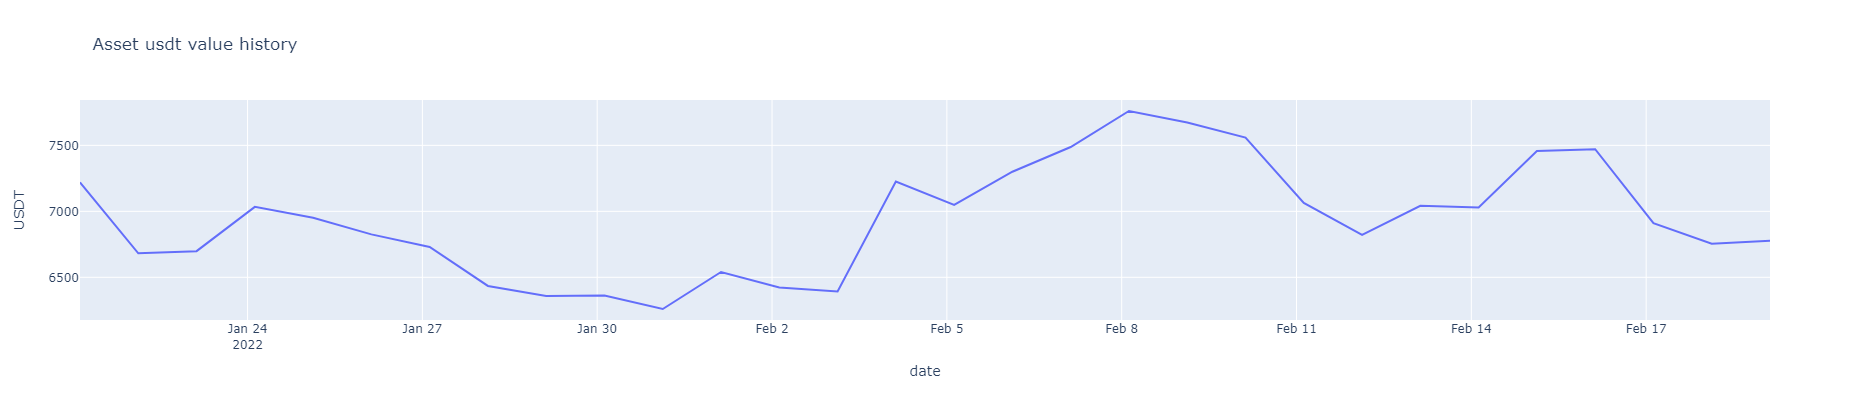

In [4]:
asset_history_fig = asset_analyser.plot_asset_usdt_value_history(history_assets)
asset_history_fig

# Analyze orders history

In [5]:
%%time
orders = client_helper.get_all_orders()
orders.head()

Avoid APIError(code=-1003), batch 0
Avoid APIError(code=-1003), batch 1
Avoid APIError(code=-1003), sleep extra 60 seconds
Avoid APIError(code=-1003), batch 2
Avoid APIError(code=-1003), sleep extra 60 seconds
Avoid APIError(code=-1003), batch 3
Wall time: 2min 54s


symbol       orderId  orderListId                         clientOrderId  \
0  SOLUSDT  3.250025e+08         -1.0  ios_ab3cb1da3d7d4d12aa9c44528512c70b   
1  BNBUSDT  2.203228e+09         -1.0  ios_f92ba5be0cd142b0b4053b3662201076   
2  BTCUSDT  6.002429e+09         -1.0  ios_1c3036291afd4846bbdf7b281a50af9b   
3  ETHUSDT  4.132587e+09         -1.0  ios_e70d9b3d520f4118aee596d465d9c73b   
4  SOLBUSD  1.076348e+08         -1.0  ios_2bbf68e8c2a4432ab9c2de475a9a9f02   

     price   origQty  executedQty  cummulativeQuoteQty  status timeInForce  \
0     41.0  0.268000     0.268000              10.9880  FILLED         GTC   
1    500.0  0.020000     0.020000              10.0000  FILLED         GTC   
2  39200.0  0.000316     0.000316              12.3872  FILLED         GTC   
3   2900.0  0.003450     0.003450              10.0050  FILLED         GTC   
4     45.0  0.273000     0.273000              12.2850  FILLED         GTC   

    type side  stopPrice  icebergQty           time     updateTime  isWorking  \
0  LIMIT  BUY        0.0         0.0  1621031032224  1621061234382        1.0   
1  LIMIT  BUY        0.0         0.0  1621333247911  1621348494879        1.0   
2  LIMIT  BUY        0.0         0.0  1621406299240  1621406765597        1.0   
3  LIMIT  BUY        0.0         0.0  1621406408728  1621408328111        1.0   
4  LIMIT  BUY        0.0         0.0  1621408334746  1621423102127        1.0   

   origQuoteOrderQty base_coin quote_coin                    date  
0                0.0       SOL       USDT 2021-05-15 01:23:52.224  
1                0.0       BNB       USDT 2021-05-18 13:20:47.911  
2                0.0       BTC       USDT 2021-05-19 09:38:19.240  
3                0.0       ETH       USDT 2021-05-19 09:40:08.728  
4                0.0       SOL       BUSD 2021-05-19 10:12:14.746

In [6]:
order_analyser = OrdersAnalyser(client_helper, orders)
mean_price = order_analyser.calculate_mean_price()
mean_price = pd.merge(mean_price, prices.rename(columns={'price':'current_price'}), on=['base_coin','quote_coin'], how='left')
mean_price['price_change_usd'] = mean_price['current_price'] - mean_price['average_price']
mean_price['price_change_percent'] = mean_price['price_change_usd']/mean_price['average_price']*100
display(mean_price.round(3))

base_coin quote_coin  average_price  n_purchases  n_sales  current_price  \
0        ADA       USDT          1.427            3        0          0.987   
1        BNB       USDT        369.717            5        0        398.000   
2        BTC       USDT      37243.827            7        2      40051.980   
3       CAKE       USDT         11.080            3        0          7.610   
4       CELR       USDT          0.095            9        0          0.046   
5        ETH       USDT       2516.045           20        0       2751.910   
6        LTC       USDT        158.418            8        0        115.600   
7       LUNA       USDT          8.287            6        0         50.470   
8        SOL       USDT         38.618            8        0         90.250   
9       USDT        RUB         73.392            9        0            NaN   
10       XRP       USDT          0.829           20        0          0.818   

    price_change_usd  price_change_percent  
0             -0.440               -30.858  
1             28.283                 7.650  
2           2808.153                 7.540  
3             -3.470               -31.318  
4             -0.049               -51.671  
5            235.865                 9.374  
6            -42.818               -27.029  
7             42.183               509.059  
8             51.632               133.699  
9                NaN                   NaN  
10            -0.011                -1.374

In [7]:
coins_asset_history = order_analyser.prepare_coins_asset_history()

Can not get prices for BETH
Can not get prices for RUB
Can not get prices for USDT
Can not get prices for SOLO
Prices dump was updated with 1 new lines (days): C:\Users\egor\PycharmProjects\binance_bot\data\dumps\prices_dump.csv


In [12]:
coins_asset_history

{'ADA':           date  usdt_cash_in_cum  coin_cum  price  coin_cum_usdt_value
 0   2021-10-25           49.8420      23.4  2.137              50.0058
 1   2021-10-26           49.8420      23.4  1.912              44.7408
 2   2021-10-27           49.8420      23.4  1.987              46.4958
 3   2021-10-28           49.8420      23.4  2.015              47.1510
 4   2021-10-29           49.8420      23.4  1.955              45.7470
 ..         ...               ...       ...    ...                  ...
 112 2022-02-14          134.7111      94.3  1.107             104.3901
 113 2022-02-15          134.7111      94.3  1.082             102.0326
 114 2022-02-16          134.7111      94.3  1.020              96.1860
 115 2022-02-17          134.7111      94.3  0.995              93.8285
 116 2022-02-18          134.7111      94.3  0.987              93.0741
 
 [117 rows x 5 columns],
 'BNB':           date  usdt_cash_in_cum  coin_cum   price  coin_cum_usdt_value
 0   2021-05-18       

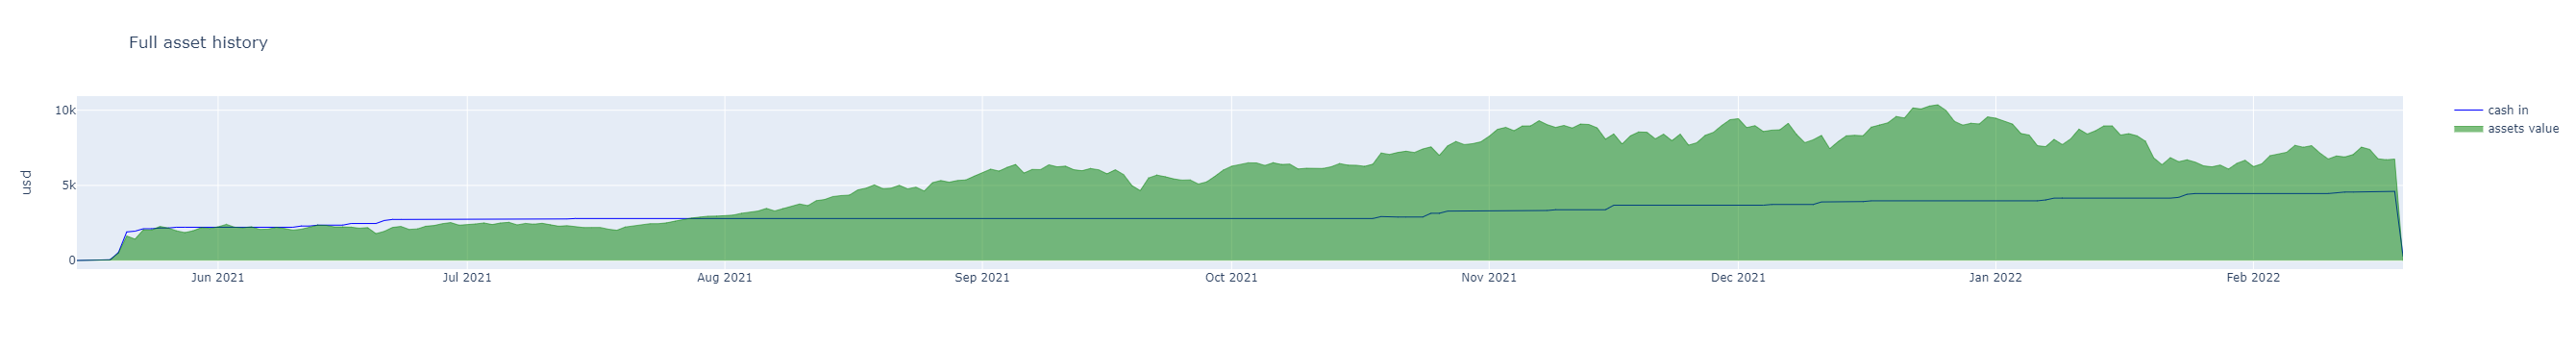

In [13]:
order_analyser.plot_full_asset_history(coins_asset_history)

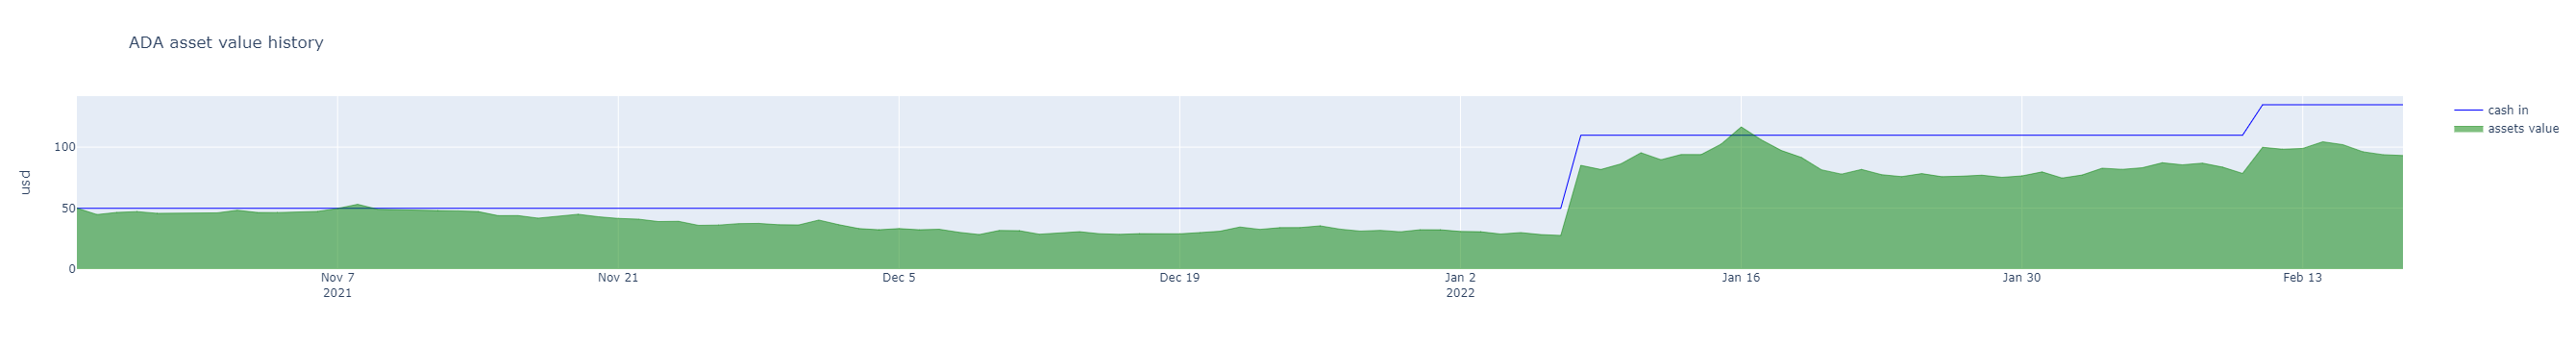

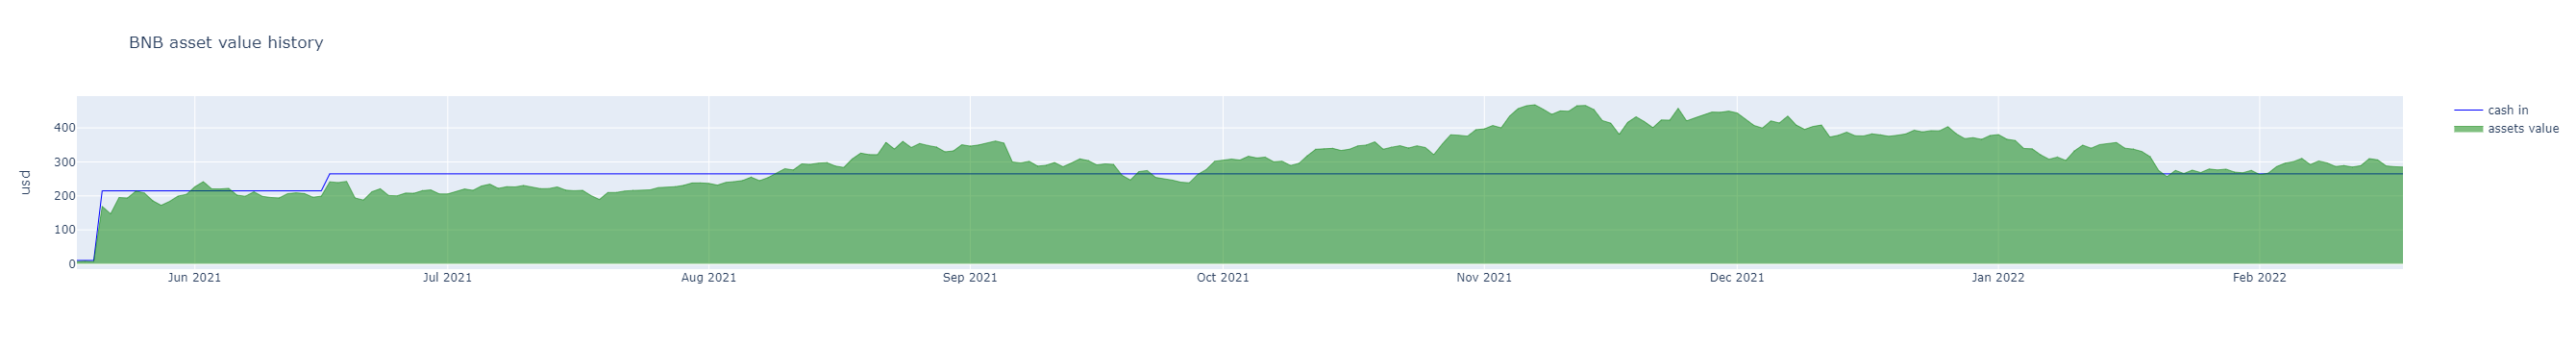

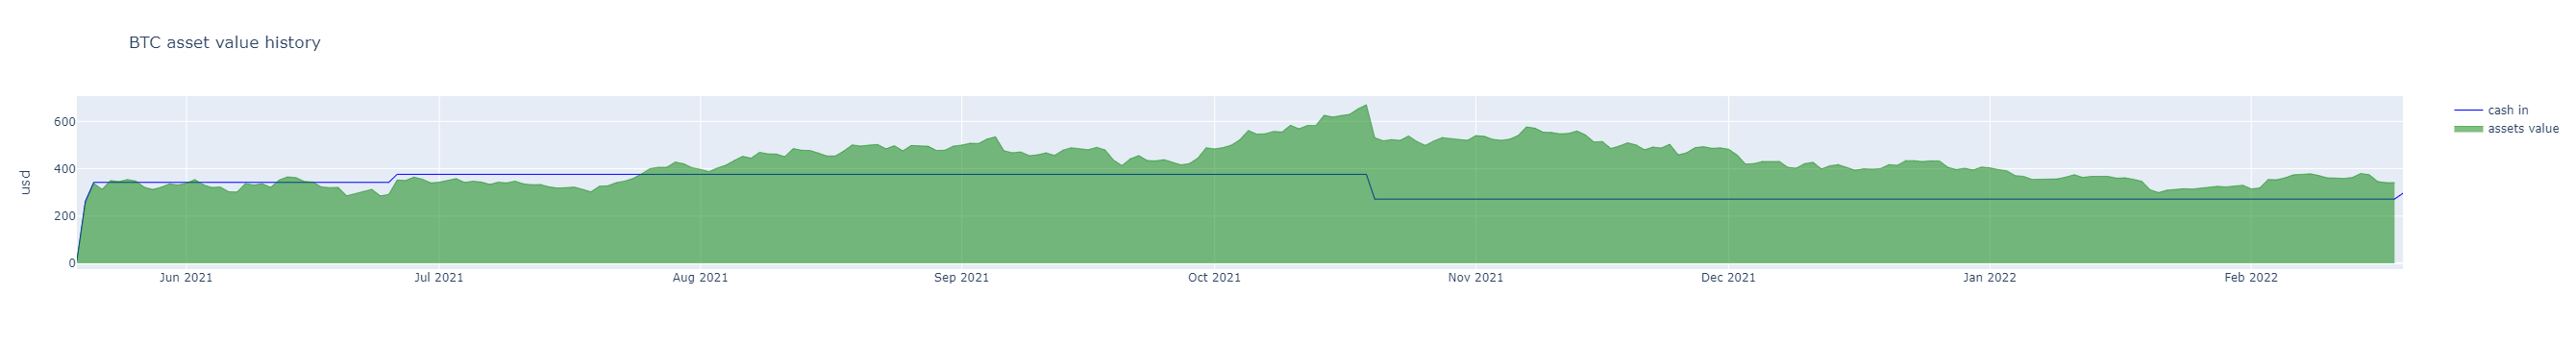

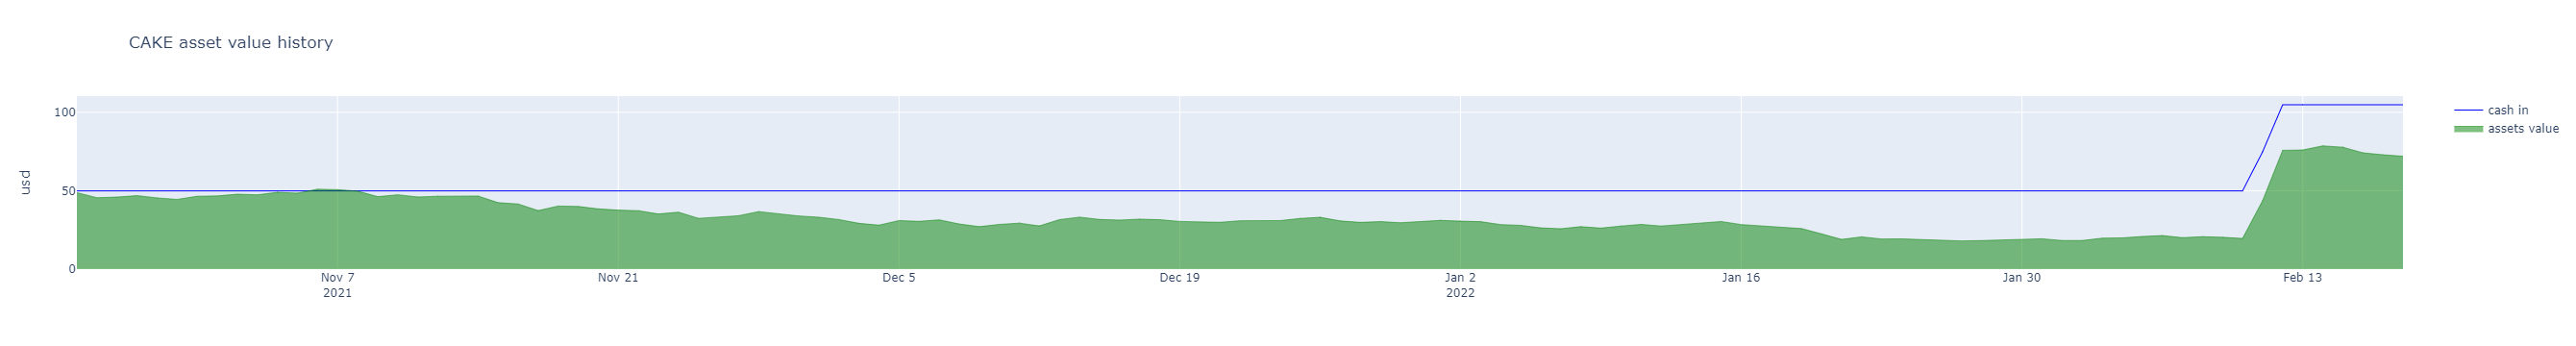

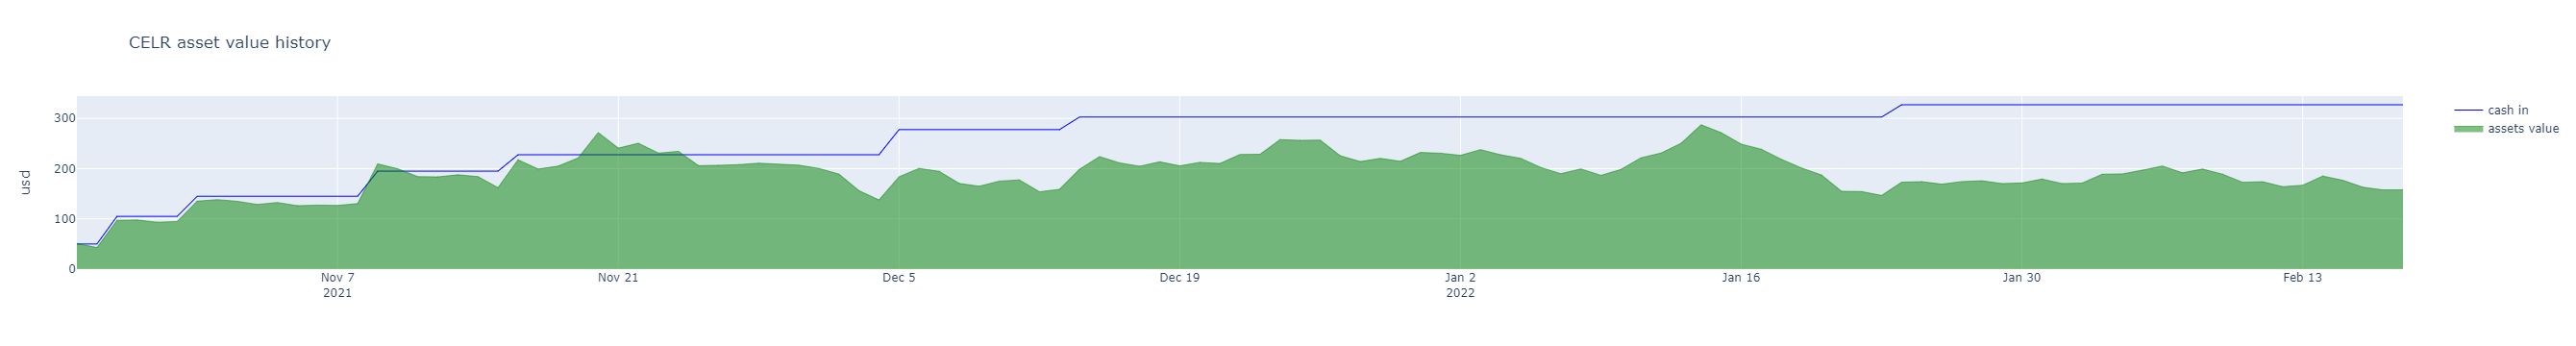

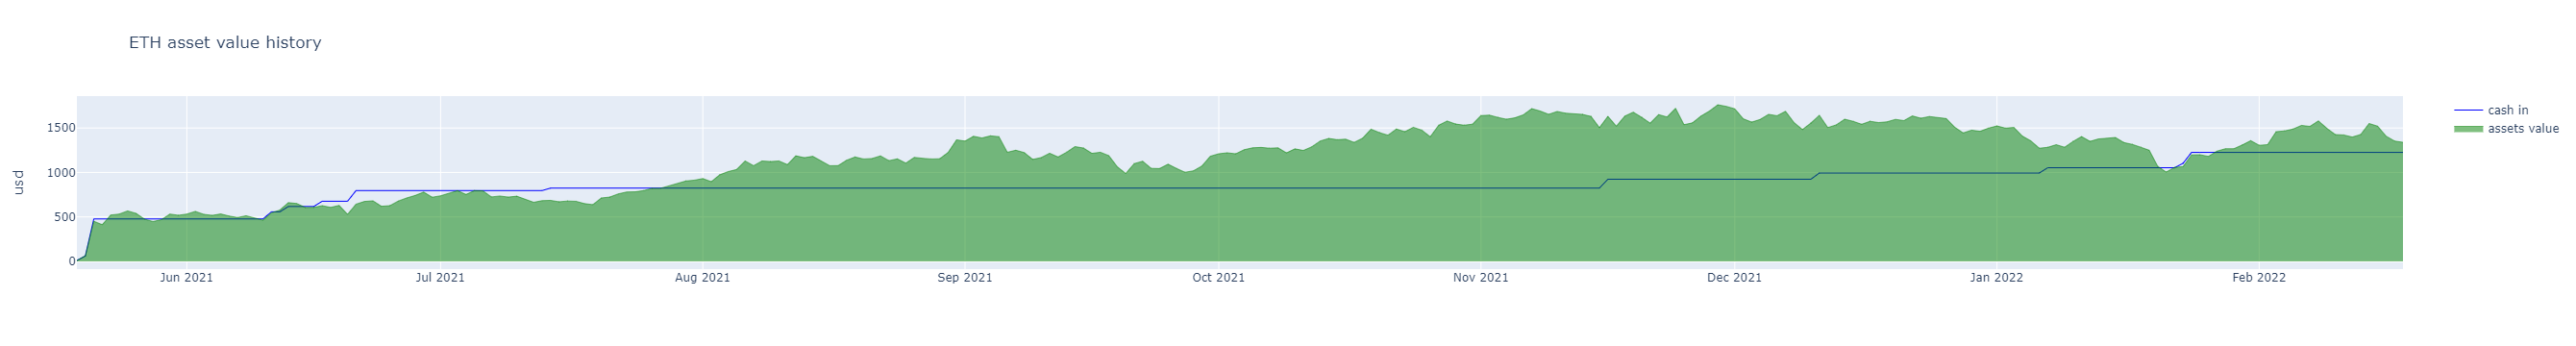

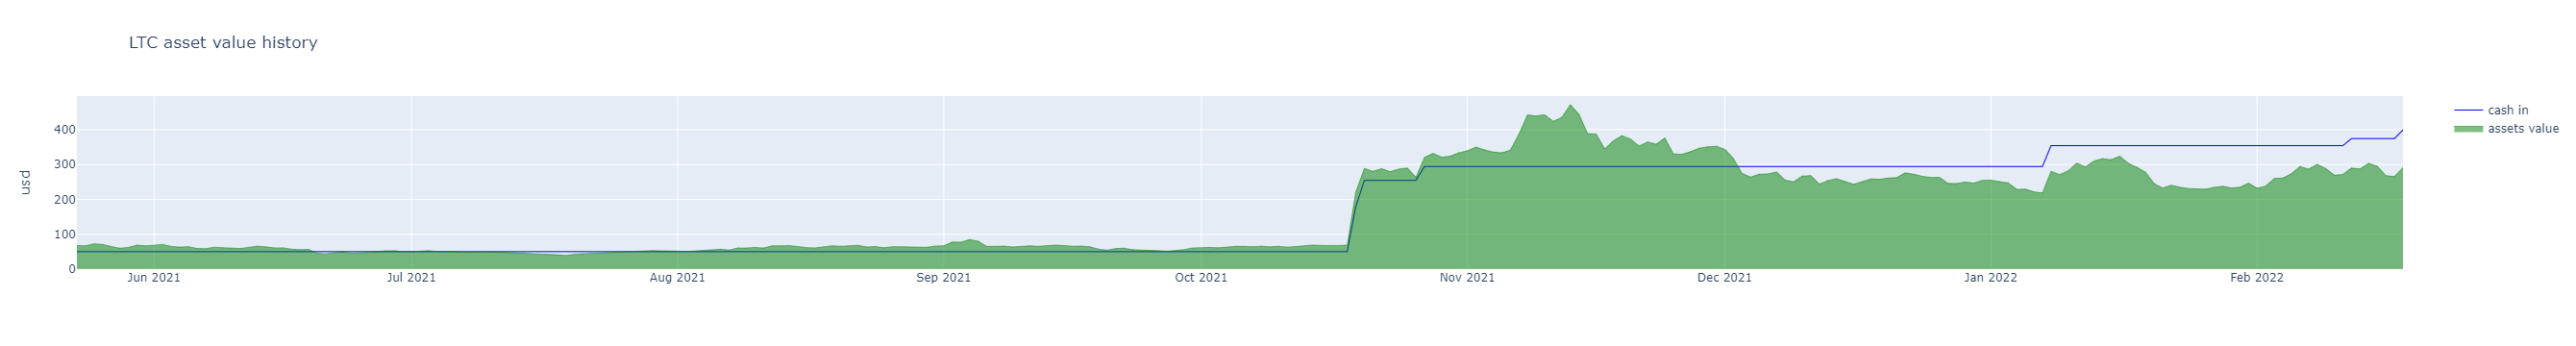

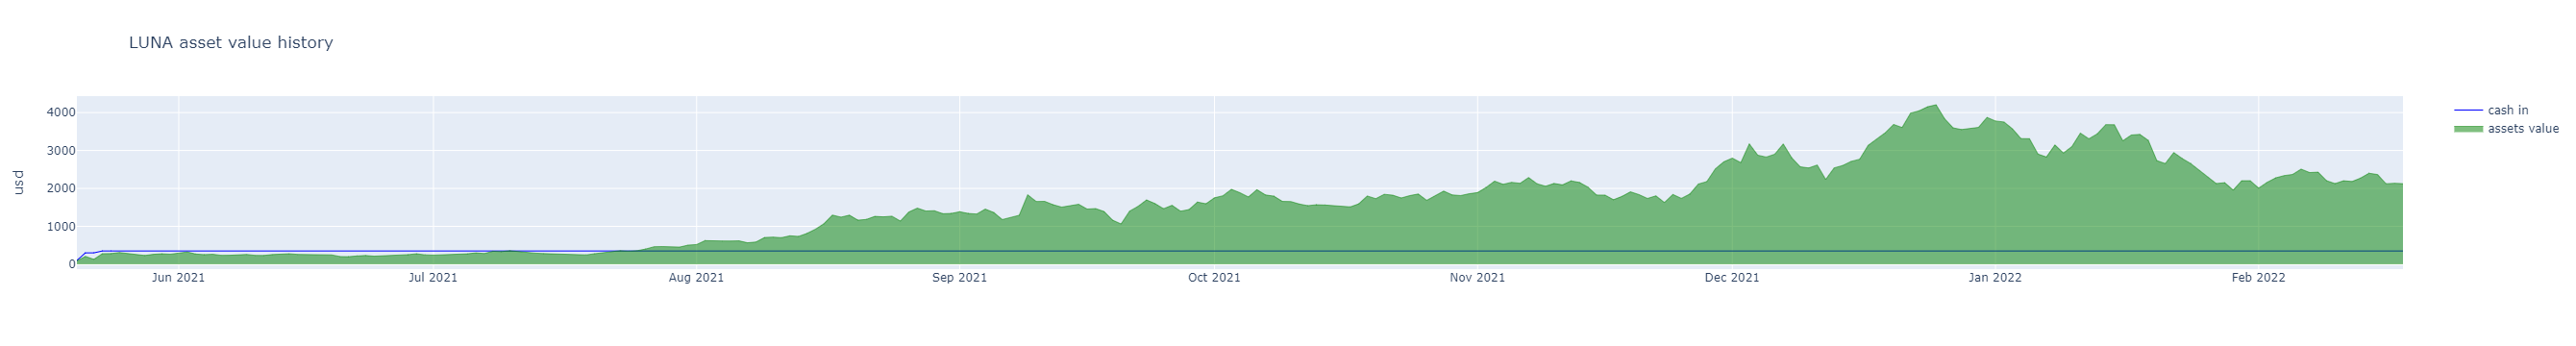

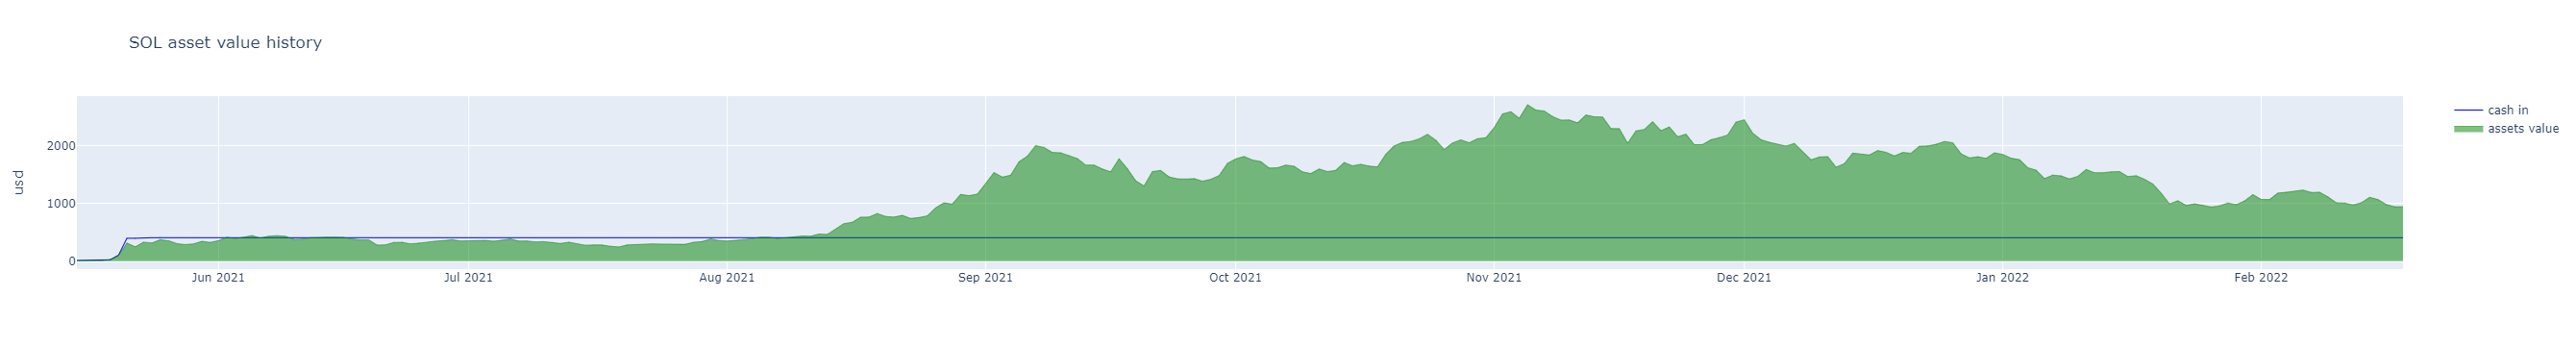

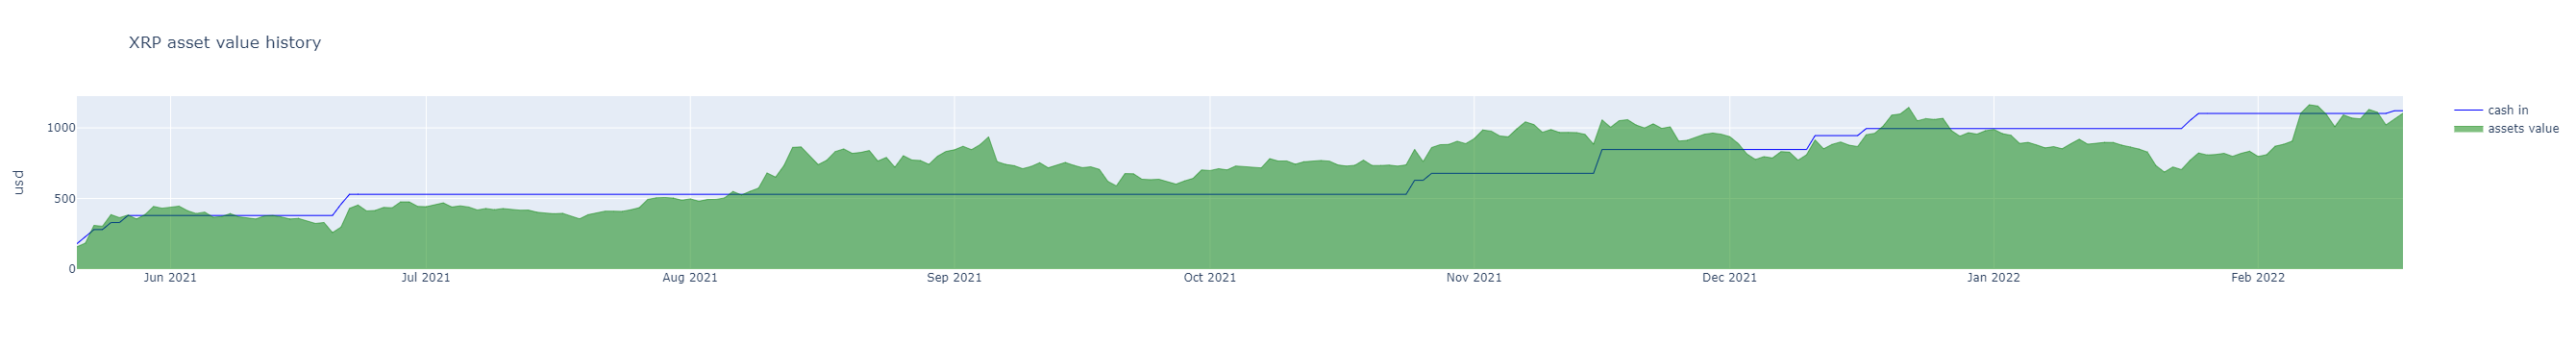

In [9]:
import plotly.graph_objects as go
order_analyser.plot_coins_asset_history(coins_asset_history)

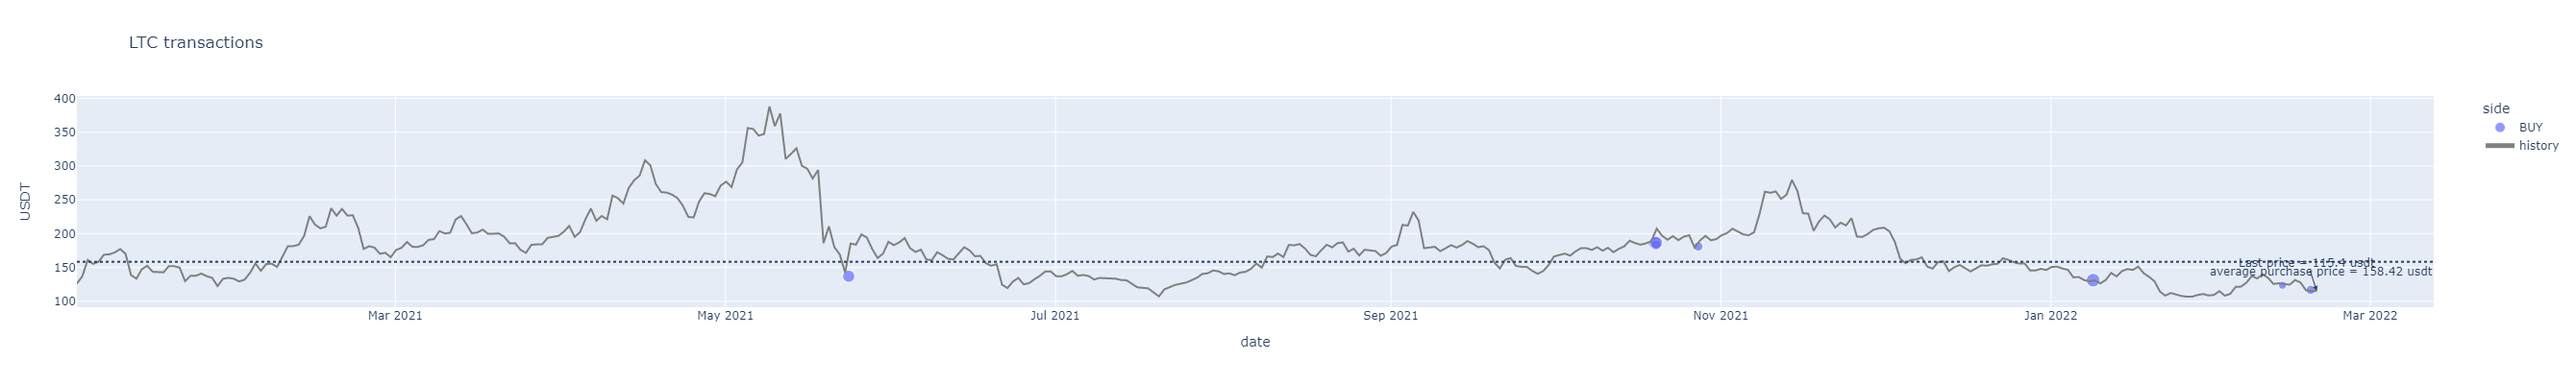

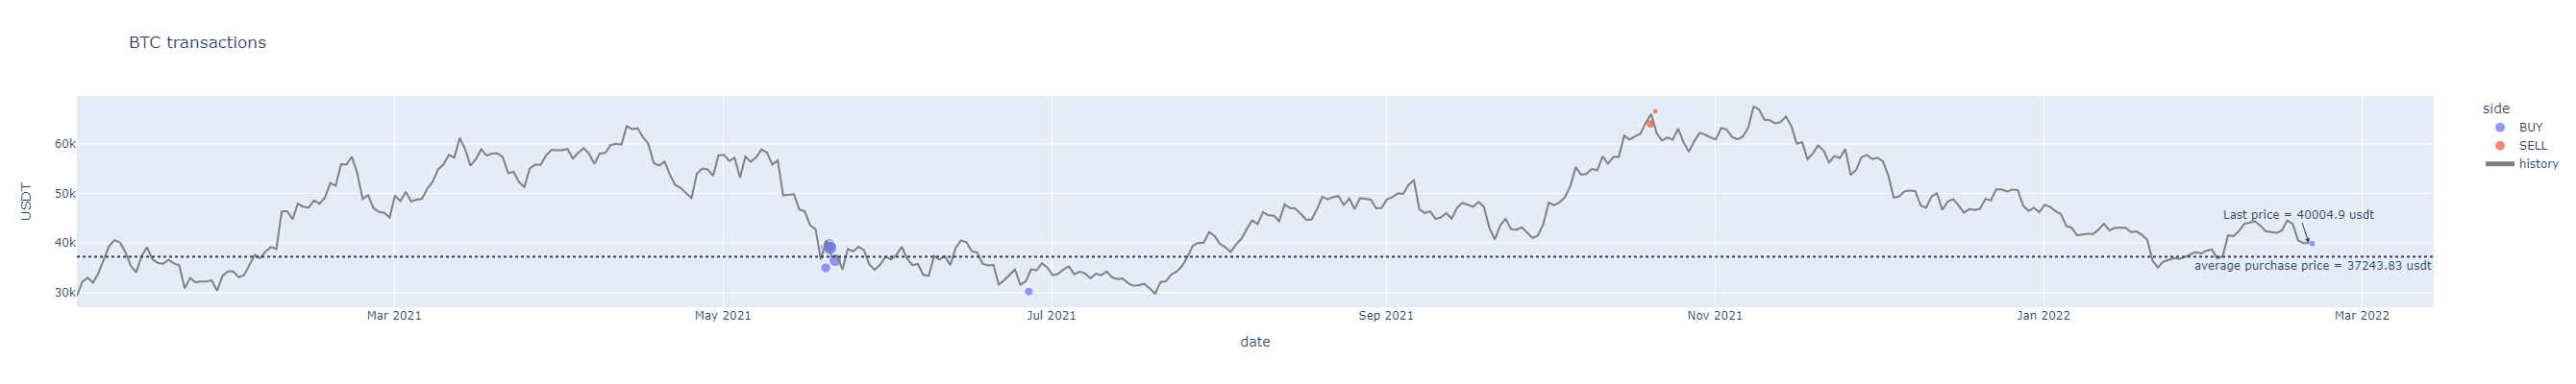

In [10]:
for base_coin in ['LTC', 'BTC']:
    price_history = client_helper.get_historical_prices(base_coin+'USDT', start_date='1 Jan, 2021')
    fig = order_analyser.plot_transactions(base_coin, price_history)
    fig.show()

In [11]:
df['price'].iloc[7]

NameError: name 'df' is not defined

In [ ]:
end_value = df['executedQty'].iloc[:6].sum()*df['price'].iloc[6]
start_value = df['cummulativeQuoteQty'].iloc[:6].sum()
print(start_value, end_value, end_value/start_value)

In [ ]:
df = orders[orders['symbol']=='BTCUSDT'].reset_index(drop=True)
df = pd.concat([df, df[3:4]], axis=0).reset_index(drop=True)
# df.loc[6, 'cummulativeQuoteQty'] = 100
from src.analysis.analyse import calculate_corrected_balance_for_pair
pair_orders = calculate_corrected_balance_for_pair(df)

In [ ]:
pair_orders

# Trade

In [ ]:

# get market depth
depth = client.get_order_book(symbol='BNBBTC')

# place a test market buy order, to place an actual order use the create_order function
order = client.create_test_order(
    symbol='BNBBTC',
    side=Client.SIDE_BUY,
    type=Client.ORDER_TYPE_MARKET,
    quantity=100)

# get all symbol prices
prices = client.get_all_tickers()

# withdraw 100 ETH
# check docs for assumptions around withdrawals
from binance.exceptions import BinanceAPIException
try:
    result = client.withdraw(
        asset='ETH',
        address='<eth_address>',
        amount=100)
except BinanceAPIException as e:
    print(e)
else:
    print("Success")

# fetch list of withdrawals
withdraws = client.get_withdraw_history()

# fetch list of ETH withdrawals
eth_withdraws = client.get_withdraw_history(coin='ETH')

# get a deposit address for BTC
address = client.get_deposit_address(coin='BTC')

# get historical kline data from any date range

# fetch 1 minute klines for the last day up until now
klines = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")

# fetch 30 minute klines for the last month of 2017
klines = client.get_historical_klines("ETHBTC", Client.KLINE_INTERVAL_30MINUTE, "1 Dec, 2017", "1 Jan, 2018")

# fetch weekly klines since it listed
klines = client.get_historical_klines("NEOBTC", Client.KLINE_INTERVAL_1WEEK, "1 Jan, 2017")

# socket manager using threads
twm = ThreadedWebsocketManager()
twm.start()

# depth cache manager using threads
dcm = ThreadedDepthCacheManager()
dcm.start()

def handle_socket_message(msg):
    print(f"message type: {msg['e']}")
    print(msg)

def handle_dcm_message(depth_cache):
    print(f"symbol {depth_cache.symbol}")
    print("top 5 bids")
    print(depth_cache.get_bids()[:5])
    print("top 5 asks")
    print(depth_cache.get_asks()[:5])
    print("last update time {}".format(depth_cache.update_time))

twm.start_kline_socket(callback=handle_socket_message, symbol='BNBBTC')

dcm.start_depth_cache(callback=handle_dcm_message, symbol='ETHBTC')

# replace with a current options symbol
options_symbol = 'BTC-210430-36000-C'
dcm.start_options_depth_cache(callback=handle_dcm_message, symbol=options_symbol)

# join the threaded managers to the main thread
twm.join()
dcm.join()